In [1]:
import findspark

findspark.init()

In [2]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello ")

df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [3]:
from pyspark.sql.types import IntegerType
df = spark.read.format("csv").option("header", "true").load("C:/Users/veua/Downloads/TYPICAL_HOURLY_VOLUME_DATA.csv")
display(df)

DataFrame[HMGNS_FLOW_ID: string, HMGNS_LNK_ID: string, HMGNS_LNK_DESC: string, FLOW: string, DOW: string, COUNT_TYPE: string, PERIOD_TYPE: string, 0:00: string, 1:00: string, 2:00: string, 3:00: string, 4:00: string, 5:00: string, 6:00: string, 7:00: string, 8:00: string, 9:00: string, 10:00: string, 11:00: string, 12:00: string, 13:00: string, 14:00: string, 15:00: string, 16:00: string, 17:00: string, 18:00: string, 19:00: string, 20:00: string, 21:00: string, 22:00: string, 23:00: string]

In [4]:
list_cols = ["0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]

In [5]:
df_cols = df.select(*list_cols)

In [6]:
df_cols.dtypes

[('0:00', 'string'),
 ('1:00', 'string'),
 ('2:00', 'string'),
 ('3:00', 'string'),
 ('4:00', 'string'),
 ('5:00', 'string'),
 ('6:00', 'string'),
 ('7:00', 'string'),
 ('8:00', 'string'),
 ('9:00', 'string'),
 ('10:00', 'string'),
 ('11:00', 'string'),
 ('12:00', 'string'),
 ('13:00', 'string'),
 ('14:00', 'string'),
 ('15:00', 'string'),
 ('16:00', 'string'),
 ('17:00', 'string'),
 ('18:00', 'string'),
 ('19:00', 'string'),
 ('20:00', 'string'),
 ('21:00', 'string'),
 ('22:00', 'string'),
 ('23:00', 'string')]

In [7]:
type(df_cols)

pyspark.sql.dataframe.DataFrame

In [8]:
#Converting all string columns to float columns
from pyspark.sql.functions import col
df1 = df_cols.select(*(col(c).cast("float").alias(c) for c in df_cols.columns))
df1.show(5)

+------+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|  0:00| 1:00| 2:00| 3:00| 4:00|  5:00|  6:00|  7:00|  8:00|  9:00| 10:00| 11:00| 12:00| 13:00| 14:00| 15:00| 16:00| 17:00| 18:00| 19:00| 20:00| 21:00| 22:00| 23:00|
+------+-----+-----+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|1314.0|835.0|636.0|562.0|531.0| 701.0|1416.0|2544.0|3169.0|2965.0|3524.0|4082.0|4336.0|4504.0|5030.0|5891.0|6279.0|6708.0|5039.0|3358.0|2853.0|2496.0|2205.0|1804.0|
|1189.0|597.0|495.0|391.0|526.0|1173.0|3089.0|5196.0|6032.0|4438.0|4473.0|4769.0|4905.0|5022.0|5874.0|7934.0|8342.0|8761.0|7501.0|4594.0|3063.0|2663.0|2347.0|1803.0|
| 836.0|461.0|316.0|299.0|442.0|1080.0|2999.0|5226.0|5967.0|4480.0|4185.0|4385.0|4706.0|4972.0|5951.0|7453.0|7955.0|8152.0|6779.0|4002.0|2834.0|2569.0|2116.0|1415.0|
|134

In [9]:
df1.dtypes

[('0:00', 'float'),
 ('1:00', 'float'),
 ('2:00', 'float'),
 ('3:00', 'float'),
 ('4:00', 'float'),
 ('5:00', 'float'),
 ('6:00', 'float'),
 ('7:00', 'float'),
 ('8:00', 'float'),
 ('9:00', 'float'),
 ('10:00', 'float'),
 ('11:00', 'float'),
 ('12:00', 'float'),
 ('13:00', 'float'),
 ('14:00', 'float'),
 ('15:00', 'float'),
 ('16:00', 'float'),
 ('17:00', 'float'),
 ('18:00', 'float'),
 ('19:00', 'float'),
 ('20:00', 'float'),
 ('21:00', 'float'),
 ('22:00', 'float'),
 ('23:00', 'float')]

In [10]:
columns = ['0:00', '1:00',  '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00',
 '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

In [11]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

assembler = VectorAssembler(inputCols=columns,    outputCol='features')
trainingData = assembler.transform(df1)
trainingData.show()

+------+------+------+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+--------------------+
|  0:00|  1:00|  2:00| 3:00| 4:00|  5:00|  6:00|  7:00|  8:00|  9:00| 10:00| 11:00| 12:00| 13:00| 14:00| 15:00| 16:00| 17:00| 18:00| 19:00| 20:00| 21:00| 22:00| 23:00|            features|
+------+------+------+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+--------------------+
|1314.0| 835.0| 636.0|562.0|531.0| 701.0|1416.0|2544.0|3169.0|2965.0|3524.0|4082.0|4336.0|4504.0|5030.0|5891.0|6279.0|6708.0|5039.0|3358.0|2853.0|2496.0|2205.0|1804.0|[1314.0,835.0,636...|
|1189.0| 597.0| 495.0|391.0|526.0|1173.0|3089.0|5196.0|6032.0|4438.0|4473.0|4769.0|4905.0|5022.0|5874.0|7934.0|8342.0|8761.0|7501.0|4594.0|3063.0|2663.0|2347.0|1803.0|[1189.0,597.0,495...|
| 836.0| 461.0| 316.0|299.0|442.0|1080.0|2999.0|5226.0|

# Bisecting KMeans
----------------------
Bisecting k-Means is like a combination of k-Means and hierarchical clustering. Instead of partitioning the data into ‘k’
clusters in each iteration, Bisecting k-means splits one cluster into two sub clusters at each bisecting step(by using k-means) until k clusters are obtained.

Basic Bisecting K-means Algorithm for finding KClusters
1. Pick a cluster to split.
2. Find 2 sub-clusters using the basic K-means algorithm.
(Bisecting step)
3. Repeat step 2, the bisecting step, for ITER times and take
the split that produces the clustering with the highest
overall similarity.
4. Repeat steps 1, 2 and 3 until the desired number of clusters
is reached.

Silhouette with squared euclidean distance = 0.9106736381072702
Cluster Centers: 


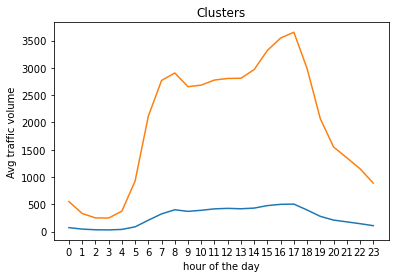

In [36]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(101)
model = bkm.fit(trainingData)

# Make predictions
predictions = model.transform(trainingData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    plt.plot(center)
    plt.xlabel("hour of the day")
    plt.xticks(range(0, 24))
    plt.ylabel("Avg traffic volume")
    plt.title("Clusters")

In [34]:
predictions.select("features","prediction").limit(5).toPandas()

,features,prediction
0,"[1314.0, 835.0, 636.0, 562.0, 531.0, 701.0, 14...",1
1,"[1189.0, 597.0, 495.0, 391.0, 526.0, 1173.0, 3...",1
2,"[836.0, 461.0, 316.0, 299.0, 442.0, 1080.0, 29...",1
3,"[1344.0, 742.0, 483.0, 423.0, 414.0, 722.0, 21...",1
4,"[1178.0, 620.0, 421.0, 359.0, 422.0, 902.0, 25...",1


From the above graph, we can conclude that blue line represents the cluster that contains traffic volumes for weekdays and 
orange line represents traffic for weekdays.